In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import torch
import torch.nn as nn

class ColorNet(nn.Module):
    def __init__(self, num_classes):
        super(ColorNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
import torch
from torchvision import transforms
colors = ['blue', 'green', 'red', 'yellow', 'black', 'white', 'brown', 'green', 'grey', 'orange', 'violet']

# Load the model class (ColorNet) and instantiate the model
loaded_model = ColorNet(num_classes=len(colors))

# Load the saved model
model_path = "/content/drive/MyDrive/Color_Recognition_Model/Color_Recognition.pth"  # Specify the path to the saved model
loaded_model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
loaded_model.eval()

ColorNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=262144, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=11, bias=True)
)

In [11]:


# Define a transform for preprocessing the input image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



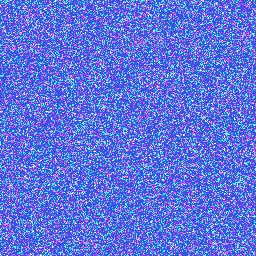

Predicted Color for Noisy Image: blue


In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
test_image_path = '/content/drive/MyDrive/Color_Recognition_Model/blue.png'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))

# Add salt and pepper noise to the image
noise_amount = .2  # Adjust the noise amount as needed
noise = np.random.choice([0, 255], size=test_image.shape, p=[1 - noise_amount, noise_amount]).astype(np.uint8)
noisy_image = cv2.add(test_image, noise)


# Perform preprocessing on the noisy image (e.g., normalization)
noisy_image = transform(noisy_image)

# Convert the noisy image to the model's data type
noisy_image = noisy_image.to(loaded_model.conv1.weight.dtype)

# Perform inference on the noisy image
with torch.no_grad():
    noisy_image = noisy_image.unsqueeze(0)  # Add a batch dimension
    predicted = loaded_model(noisy_image)
    _, predicted_class = torch.max(predicted, 1)

# Get the predicted color label for the noisy image
predicted_color = colors[predicted_class.item()]


# Convert the noisy image back to a format suitable for displaying with cv2_imshow
noisy_image_example = noisy_image.squeeze().cpu().permute(1, 2, 0).numpy()
noisy_image_for_display = (noisy_image_example * 255).astype(np.uint8)

# Display the noisy image
cv2_imshow(noisy_image_for_display)

# Print the predicted color label
print(f"Predicted Color for Noisy Image: {predicted_color}")


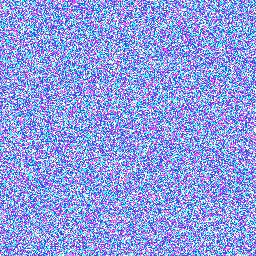

Predicted Color for Noisy Image: white


In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
test_image_path = '/content/drive/MyDrive/Color_Recognition_Model/blue.png'
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (256, 256))

# Add salt and pepper noise to the image
noise_amount = .45  # Adjust the noise amount as needed
noise = np.random.choice([0, 255], size=test_image.shape, p=[1 - noise_amount, noise_amount]).astype(np.uint8)
noisy_image = cv2.add(test_image, noise)


# Perform preprocessing on the noisy image (e.g., normalization)
noisy_image = transform(noisy_image)

# Convert the noisy image to the model's data type
noisy_image = noisy_image.to(loaded_model.conv1.weight.dtype)

# Perform inference on the noisy image
with torch.no_grad():
    noisy_image = noisy_image.unsqueeze(0)  # Add a batch dimension
    predicted = loaded_model(noisy_image)
    _, predicted_class = torch.max(predicted, 1)

# Get the predicted color label for the noisy image
predicted_color = colors[predicted_class.item()]


# Convert the noisy image back to a format suitable for displaying with cv2_imshow
noisy_image_example = noisy_image.squeeze().cpu().permute(1, 2, 0).numpy()
noisy_image_for_display = (noisy_image_example * 255).astype(np.uint8)

# Display the noisy image
cv2_imshow(noisy_image_for_display)

# Print the predicted color label
print(f"Predicted Color for Noisy Image: {predicted_color}")